<a href="https://colab.research.google.com/github/Gaikwadpawan3006/Sentimate-Analysis-EDA-On-Twitter-Dataset/blob/main/Sentimate_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentimate Model Analysis**

## Name : Gaikwad Pawan Ramesh

## **Import Necessary Libraries**




In [69]:
import numpy as np  
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


## **Read and Load the Dataset**

In [42]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding=DATASET_ENCODING,names=DATASET_COLUMNS, skiprows=795000, nrows = 10000)

## **Exploratory Data Analysis On Dataset**

 **Five top records of data**

In [43]:
dataset.head()

,target,ids,date,flag,user,text
0,0,2327192646,Thu Jun 25 08:02:13 PDT 2009,NO_QUERY,quiz_master,Was having dinner with parents downstairs in D...
1,0,2327193206,Thu Jun 25 08:02:16 PDT 2009,NO_QUERY,djcampos,Blah 5am still up daang I got deep problems
2,0,2327193455,Thu Jun 25 08:02:17 PDT 2009,NO_QUERY,RKF,@jenspeedy I would suggest avoiding 360 Living...
3,0,2327193641,Thu Jun 25 08:02:18 PDT 2009,NO_QUERY,AnaHertz,@alexbroun I didn't convince myself I was fat ...
4,0,2327193806,Thu Jun 25 08:02:18 PDT 2009,NO_QUERY,yenafer,"@spotzle @jstarrh check on sunscreen, snacks, ..."


**Five last records of data**

In [44]:
dataset.tail()

,target,ids,date,flag,user,text
9995,4,1468599653,Tue Apr 07 02:39:03 PDT 2009,NO_QUERY,danalynbyers,"@lbran, thanks for sending us the package - go..."
9996,4,1468599688,Tue Apr 07 02:39:04 PDT 2009,NO_QUERY,joscelinyeo,@ickleoriental hahahha.. U obviously don't hv ...
9997,4,1468599702,Tue Apr 07 02:39:04 PDT 2009,NO_QUERY,serengetisunset,"@juliekoh It's an internet term, but it's spil..."
9998,4,1468599765,Tue Apr 07 02:39:06 PDT 2009,NO_QUERY,broombeck,new day.... NEW TRACK!!!!
9999,4,1468599793,Tue Apr 07 02:39:07 PDT 2009,NO_QUERY,aptronym,@foodieguide Okay we need to have a competitio...


**Total Number of Columns in Dataset**

In [45]:
dataset.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

**Shape of data**

In [46]:
dataset.shape

(10000, 6)

In [68]:
dataset['target'].dtype

dtype('int64')

**detail of dataset in max,std,count**

In [47]:
dataset.describe()

,target,ids
count,10000.0000,1.000000e+04
mean,2.0000,1.898212e+09
std,2.0001,4.300023e+08
min,0.0000,1.467822e+09
25%,0.0000,1.468239e+09
50%,2.0000,1.897896e+09
75%,4.0000,2.328189e+09
max,4.0000,2.329206e+09


**Data information**

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  10000 non-null  int64 
 1   ids     10000 non-null  int64 
 2   date    10000 non-null  object
 3   flag    10000 non-null  object
 4   user    10000 non-null  object
 5   text    10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [49]:
dataset['target'].value_counts()


4    5000
0    5000
Name: target, dtype: int64

**Checking for missing values**

In [50]:
dataset.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

# **Data Preprocessing**

**Selecting the text and Target column for our further analysis**

In [51]:
data=dataset[['text','target']]

**Print unique values of target**

In [52]:
data['target'].unique()

array([0, 4])

In [77]:
dataset['user'].unique()

array(['swgalibertarian', 'captain_jen', 'UntoldElegance', ...,
       'AlexneedsJK', 'redsoxjustine', 'Celticpussycat'], dtype=object)

**Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)**

In [53]:
dataset['target'] = dataset['target'].replace(4,1)

**Print unique values of target**

In [70]:
data['target'].unique()

array([0, 4])

**Target class is balanced after subsetting the data**

In [71]:
dataset['target'].value_counts()

0    5000
1    4999
Name: target, dtype: int64

**Applying the Preprocess Function on the subset data**

In [72]:
dataset['text'] = dataset['text'].apply(lambda x: preprocess(x))

# **Data Visualization of Target Variables**

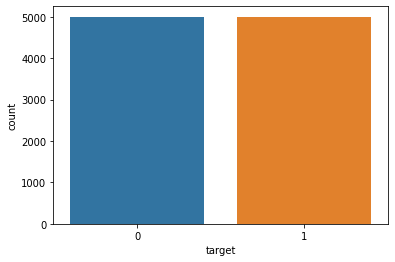

In [63]:
import seaborn as sns
sns.countplot(x='target', data=dataset)

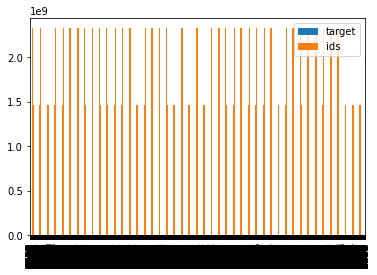

In [88]:
dataset.plot(kind = 'bar')

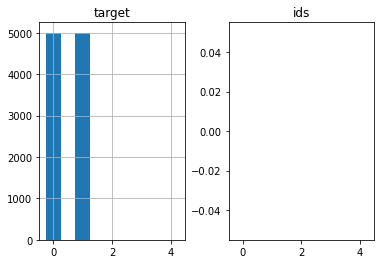

In [80]:
dataset.hist(bins=np.arange(0, 5, 0.5)-0.25)
plt.grid(False)
plt.show()

In [ ]:
users = dataset['user'].value_counts()[:10]
users.plot(kind='bar', color='red')

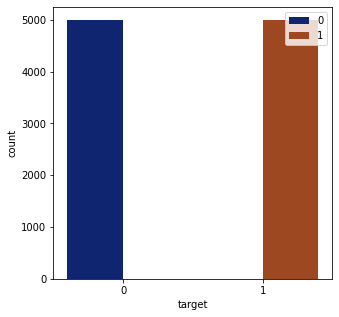

In [91]:
plt.rcParams['figure.figsize'] = (5,5)
sns.countplot(dataset["target"],hue = dataset["target"],palette = 'dark')
plt.legend(loc = 'upper right')
plt.show()

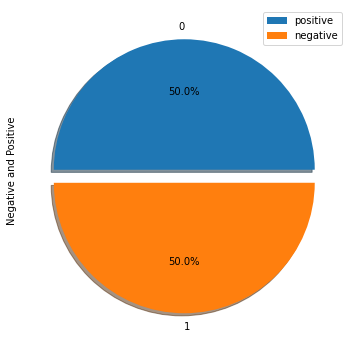

In [95]:
dataset["target"].value_counts().plot(kind = 'pie', explode = [0,0.1], figsize = (6,6), autopct = '%1.1f%%', shadow = True)

plt.ylabel("Negative and Positive")
plt.legend(["positive", "negative"])
plt.show()

# **Thank you so much**